In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from data_analysis import get_hyp1_data, plot_data, calc_corr

## Hypothesis 1: The hike in the price of food for developing countries is low as compared to underdeveloped countries.

### Read the food prices dataset

In [17]:
combined_data = get_hyp1_data()

selective_data = combined_data.loc[((combined_data.country_name == "Kenya") | (combined_data.country_name == "Gambia")) & (combined_data.commodity_name == "Bread")]
selective_data.head()


,country_name,commodity_name,month,year,price,country_status,price_factor,usd_price
114406,Gambia,Bread,5,2013,15.00,Underdeveloped,0.019,0.28500
114407,Gambia,Bread,6,2013,15.38,Underdeveloped,0.019,0.29222
114408,Gambia,Bread,7,2013,13.33,Underdeveloped,0.019,0.25327
114409,Gambia,Bread,8,2013,11.11,Underdeveloped,0.019,0.21109
114410,Gambia,Bread,9,2013,15.00,Underdeveloped,0.019,0.28500


In [12]:
new = selective_data.groupby(['country_name','year'])['usd_price'].mean().reset_index()
new['pct'] = new['usd_price'].pct_change().fillna(0)
new

,country_name,year,usd_price,pct
0,Gambia,2013,0.271905,0.000000
1,Gambia,2014,0.276230,0.015908
2,Gambia,2015,0.289065,0.046464
3,Gambia,2016,0.306636,0.060786
4,Gambia,2017,0.337695,0.101287
5,Kenya,2006,0.232883,-0.310373
6,Kenya,2007,0.252167,0.082803
7,Kenya,2008,0.296667,0.176471
8,Kenya,2009,0.301858,0.017500
9,Kenya,2010,0.315950,0.046683


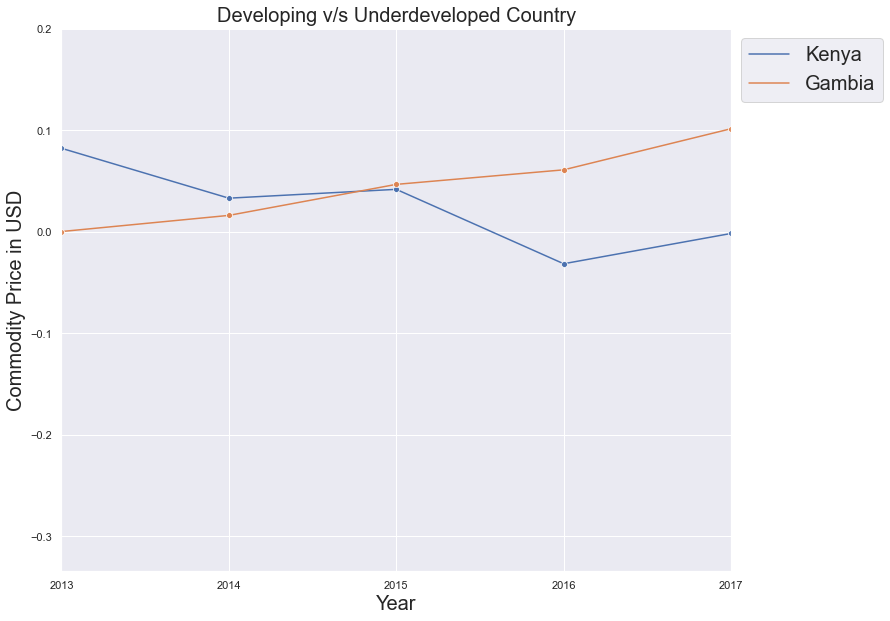

In [13]:
# subset_data = select_data(combined_data, country1, country2, commodity)
new.sort_values(by='year', inplace=True)

#     Find a common minimum and maximum year for the selected countries and commodity, to be set as x limits

q1, q2 = new[new['year'] == new.groupby(new['country_name'])['year'].min().max()][
             'year'].unique(), \
         new[new['year'] == new.groupby(new['country_name'])['year'].max().min()][
             'year'].unique()

#     Create a list of unique years to be used as x labels

unique_yrs = []
for year in new['year'].unique():
    if year in range(q1[0], q2[0] + 1):
        unique_yrs.append(year)

# new_data = subset_data.groupby(['country_name', 'year'])['usd_price'].mean().reset_index()
# t = new_data.groupby('country_name').apply(lambda x: calc_diff(x))
ax1 = sns.lineplot(data=new, x="year", y="pct", ci=None, hue="country_name", sort=True, marker='o')
ax1.set_xticks([i for i in unique_yrs])
ax1.set_xlim(q1[0], q2[0])
ax1.set_xlabel("Year", fontsize=20)
ax1.set_ylabel("Commodity Price in USD", fontsize=20)
ax1.set_title('Developing v/s Underdeveloped Country', fontsize=20)
sns.set(rc={'figure.figsize': (12, 10)})
plt.legend(loc=2, bbox_to_anchor=(1, 1), prop={"size": 20})
plt.show()

### Pearson correlation coefficient and p-value for testing non-correlation

<font size = '3'>The Pearson correlation coefficient measures the linear relationship between two datasets. The calculation of the p-value relies on the assumption that each dataset is normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)</font>

## Now, lets compare the price of Bread for Kenya (Developing) and Gambia (Underdeveloped)

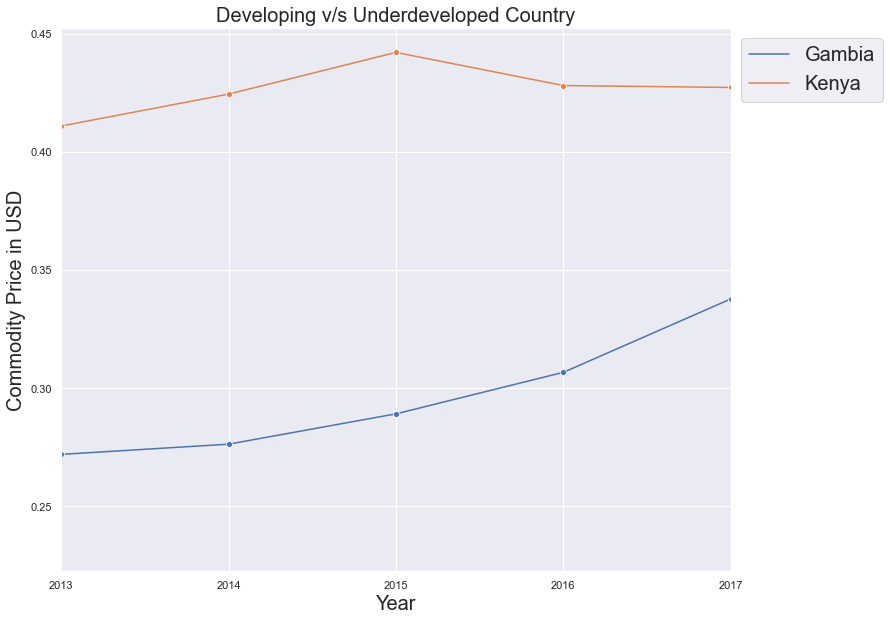

(0.08871388487156996, 0.7349230720466992)

In [9]:
plot_data(combined_data, "Kenya", "Gambia", "Bread")
calc_corr(combined_data, "Kenya", "Gambia", "Bread")

<font size = '3'>Here, Although the graphs have a positive slope from the years 2013 to 2015, we can observe a negative slope in the price of Bread in Kenya for the year 2015-2016. Furthermore, the correlation coefficient is 0.08. As the correlation coefficient is close to zero, we can conclude that there is no correlation between the price of bread between the two countries.</font>

# To conduct further analysis, let us test four more countries for the same commodity i.e Bread.
### First we consider, Tajikistan (Developing) and Guinea (Underdeveloped)

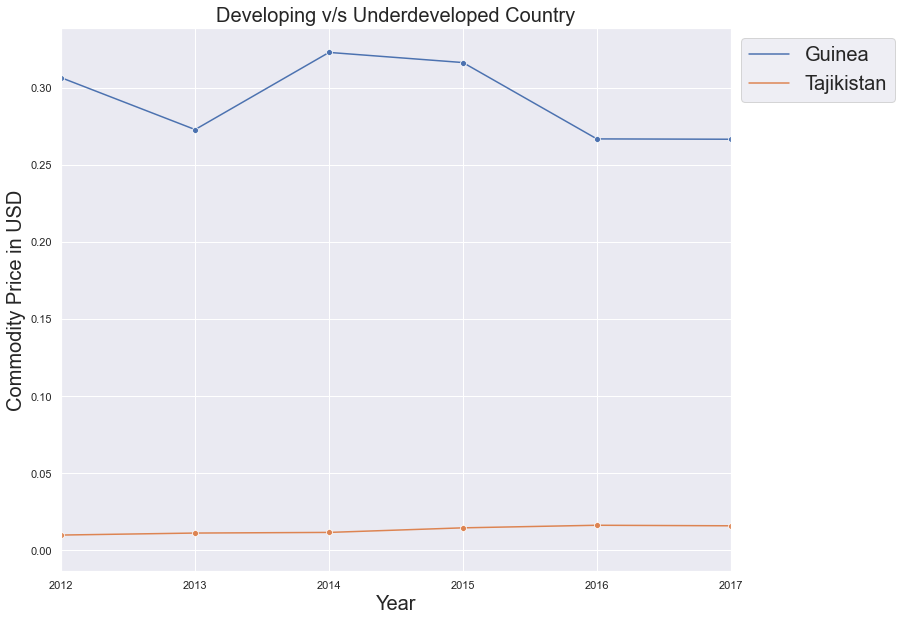

(-0.16923872212475943, 0.2964979855146012)

In [4]:
plot_data(combined_data, "Tajikistan", "Guinea", "Bread")
calc_corr(combined_data, "Tajikistan", "Guinea", "Bread")

### Tajikistan (Developing) and Kyrgyzstan (Underdeveloped)

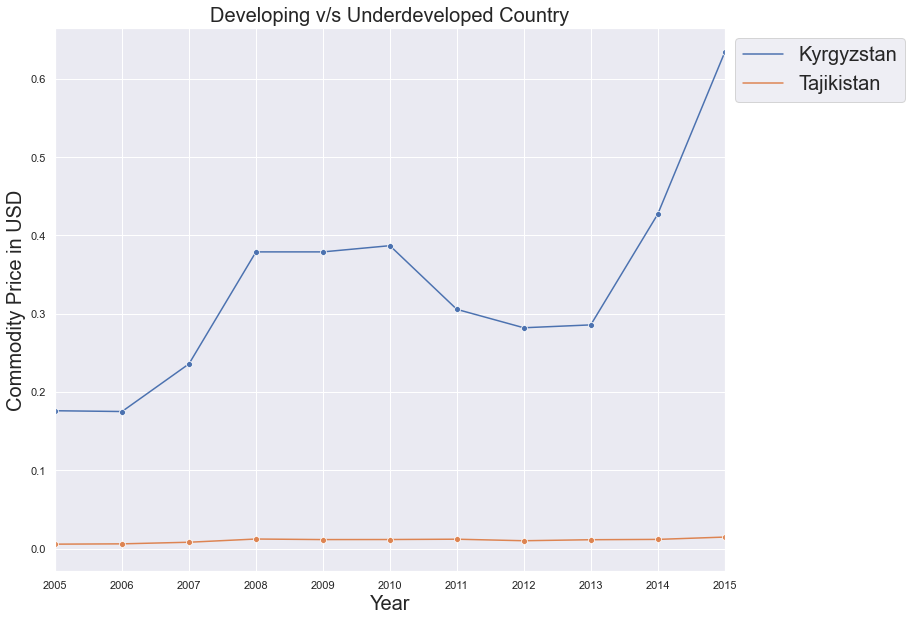

(0.7503446389080118, 1.3842876117281138e-16)

In [5]:
plot_data(combined_data, "Tajikistan", "Kyrgyzstan", "Bread")
calc_corr(combined_data, "Tajikistan", "Kyrgyzstan", "Bread")

<font size = '3'>Lets consider the first graph i.e Tajikistan (Developing) and Guinea (Underdeveloped):
    
The price of Bread in Tajikistan has observed slight up and down variation over the years. On the other hand, the price of Bread in Guinea reached a peak of ~0.32 and a bottom of ~0.26 over the same period.

Moving on to the next graph i.e Tajikistan (Developing) and Kyrgyzstan (Underdeveloped):

Kyrgyzstan has a steep positive slope from the years 2013 to 2015. For the same period, Tajikistan also has a positive slope, but the value of slope is comparatively less.

Lastly, the correlation coefficient for the two graphs is -0.16 and 0.75 respectively. Although there is a possibility of correlation between the price of Bread for Tajikistan (Developing) and Kyrgyzstan (Underdeveloped) in the future, the observed variation and uncertainty visible in the three graphs clearly indicate that the increase/decrease of bread prices is unrelated.</font>


# Now, to further examine the trend, lets test our analysis for a different commodity, i.e Wheat

### Comparing price of Wheat for Afghanistan (Developing) and Pakistan (Underdeveloped)

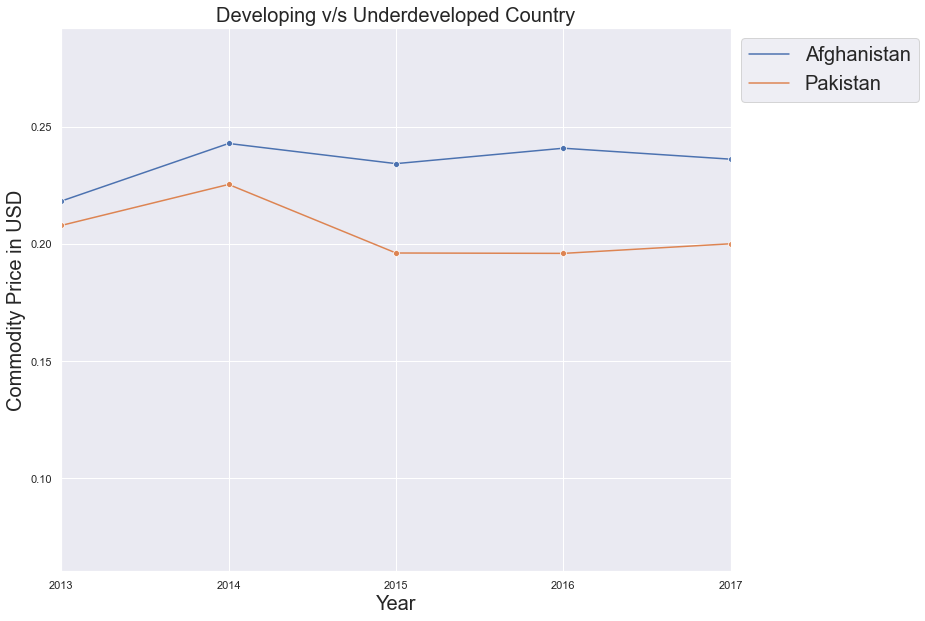

(0.305055281550167, 0.12180195351693131)

In [6]:
plot_data(combined_data, "Afghanistan", "Pakistan", "Wheat")
calc_corr(combined_data, "Afghanistan", "Pakistan", "Wheat")

<font size = '3'>For the initial years of the above graph, the lines follow a same trend, which aligns to our said hypothesis. But if we observe the year 2015-2016, price of Wheat increases in Afghanistan whereas it stays the same in Pakistan. Lastly, for the year 2016-2017, the price of wheat follows an opposite trend to what was seen earlier. The commodity price decreases in Afghanistan whereas it increases in Pakistan. Lastly, the correlation coefficient is 0.3, therefore the price of wheat for the two countries are not related.</font>

### Comparing price of Wheat for Nepal (Developing) and Ethiopia (Underdeveloped)

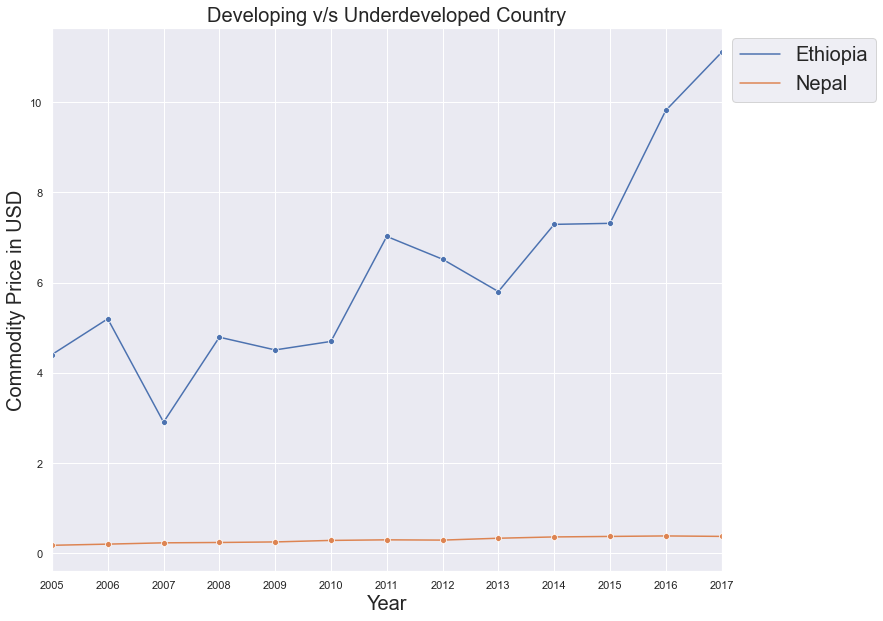

(-0.17651668707700724, 0.07895241820803554)

In [7]:
plot_data(combined_data, "Nepal", "Ethiopia", "Wheat")
calc_corr(combined_data, "Nepal", "Ethiopia", "Wheat")

### Comparing price of Wheat for India (Developing) and Pakistan (Underdeveloped)

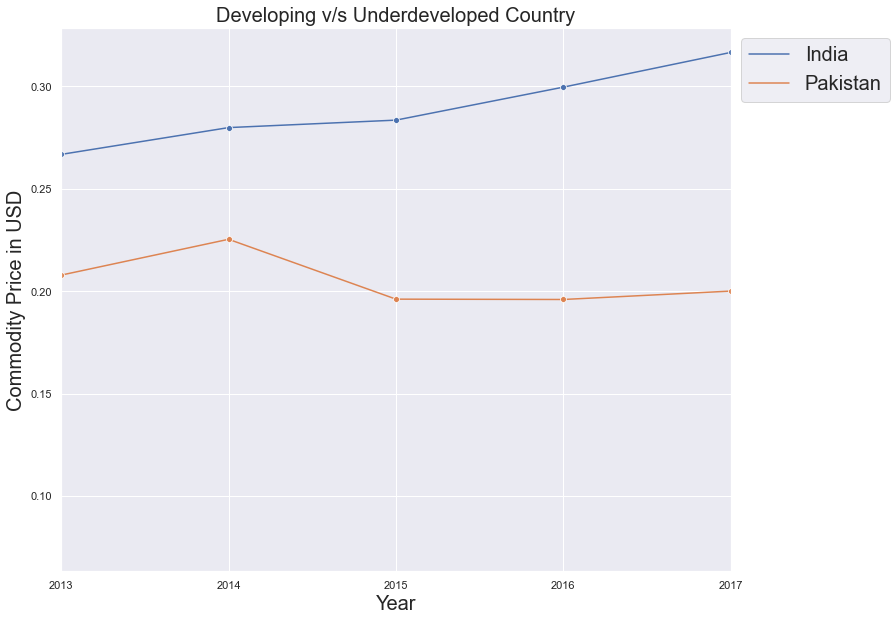

(0.22274829066815113, 0.2640932178164745)

In [8]:
plot_data(combined_data, "India", "Pakistan", "Wheat")
calc_corr(combined_data, "India", "Pakistan", "Wheat")

<font size = '3'>Let us consider the first graph i.e Nepal (Developing) and Ethiopia (Underdeveloped):
    
On one hand the price of Wheat was highly stable in Nepal while on the other hand the price of wheat in Ethiopia observed several ups and downs.

Similarly, in the above graph i.e India (Developing) and Pakistan (Underdeveloped):
    
The two countries follow a similar trend for the year 2013-2014 but for the year 2014-2015 they follow an opposite pattern. For the year 2014-2015, the price of wheat in India goes from ~0.27 USD to ~0.28 USD whereas in Pakistan the same goes from ~0.23 USD to ~0.19 USD. This clearly indicates that the food prices in the two countries are not related to each other.
Laslty, the correlation coefficient for the two graphs is -0.17 and 0.22 respectively, this confirms our observation.</font>

### From the above analysis, it is clearly evident that the food prices in Developing and Underdeveloped countries are not related.
# Therefore we reject our hypothesis